# Projeto Estatística I - Santander Coders Data Science

<pre>
Professor: Alex Lima
Alunos:    Bruno Henrique
           Fernanda Beatriz Dallaqua
           Natalia Brito
           Vinícius D' Lucas
</pre>           

# Sao Paulo housing prices

O dataset escolhido para este projeto foi o Sao Paulo housing prices, [disponível](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices/) na plataforma Kaggle.

-- descrição do dataset

talvez colocar uma imagem dos bairros/distritos de SP

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [11]:
print(f'Número de endereços únicos no dataset: {len(list(df["address"].unique()))}')
print(f'Número de bairros únicos no dataset: {len(list(df["district"].unique()))}')

Número de endereços únicos no dataset: 5348
Número de bairros únicos no dataset: 1199


### Quais são os top 10 bairros com mais imóveis no dataset?

In [37]:
df_bairros = df.groupby(['district'],as_index=False)['address'].count().sort_values(['address'],ascending=False)
df_bairros['Porcentagem'] = round(100 * df_bairros['address']/sum(df_bairros['address']),2)
df_bairros.head(15)

,district,address,Porcentagem
26,Bela Vista,352,3.02
982,Vila Mariana,232,1.99
384,Jardim Paulista,220,1.89
67,Centro,178,1.53
668,Pinheiros,159,1.36
131,Consolação,157,1.35
708,Santana,152,1.30
563,Mooca,147,1.26
709,Santo Amaro,146,1.25
43,Brás,141,1.21


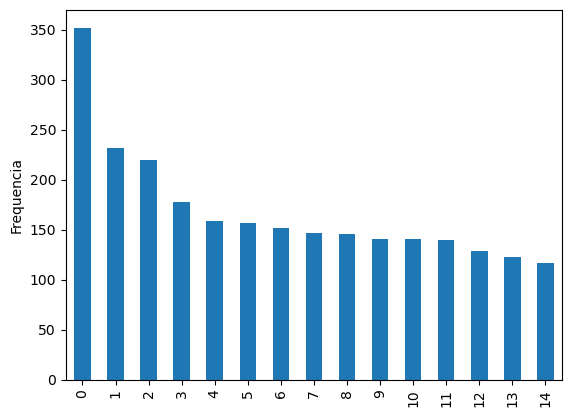

In [34]:
df_bairros.iloc[0:15].plot(kind='bar',xlabel='Bairros',ylabel='Frequencia',use_index=False,legend=False);

### Quantos são os tipos de imóveis pelo top 10 bairros com mais imóveis?

In [60]:
df_bairros_imoveis = df.groupby(['district','type'],as_index=False)['address'].count()
df_bairros_imoveis.head()
#como fazer sort pelos grupos? para ter quais são os tipos de imóveis pelos bairros com mais imóveis?

,district,type,address
0,Aclimação,Apartamento,39
1,Aclimação,Casa,9
2,Aclimação,Studio e kitnet,2
3,Adalgisa,Apartamento,2
4,Adalgisa,Casa,2


### Quantos imóveis de cada tipo o dataset possui?

In [61]:
print('Quais são os tipos de imóveis?')
print(list(df['type'].unique()))

Quais são os tipos de imóveis?
['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa']


In [66]:
df_imoveis = df.groupby('type',as_index=False)['address'].count() 
df_imoveis['Porcentagem'] = round(100*df_imoveis['address']/sum(df_imoveis['address']),2)
df_imoveis.sort_values('Porcentagem',ascending=False,inplace=True)
df_imoveis.head()

,type,address,Porcentagem
0,Apartamento,7194,61.71
1,Casa,2841,24.37
3,Studio e kitnet,1381,11.85
2,Casa em condomínio,241,2.07


<Axes: ylabel='Porcentagem'>

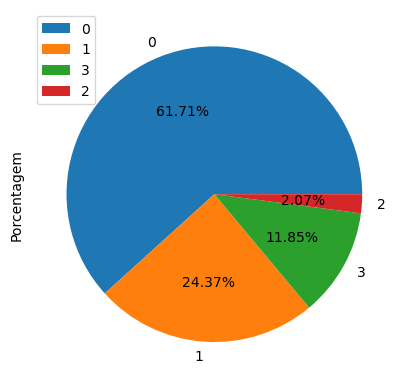

In [77]:
df_imoveis.plot(y='Porcentagem', x=df['type'], kind='pie',autopct='%1.2f%%')
